#Covolutional Autoencoder

In [2]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing import image

#importing the dataset

In [3]:
cat_train_path = '/content/drive/MyDrive/dataset/training_set/cats/'

cat_train=[]

for filename in os.listdir(cat_train_path):
    if filename.endswith(".jpg"):
        img = image.load_img(cat_train_path+filename, target_size=(128, 128))
        cat_train.append(image.img_to_array(img))

cat_train = np.array(cat_train)


In [1]:
cat_train.shape

NameError: ignored

#CAE 

In [ ]:
input_layer = layers.Input(shape=(128, 128, 3), name="INPUT")
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = layers.MaxPooling2D((2, 2), name="CODE")(x)

#regeneration part
x = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2,2))(x)
output_layer = layers.Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)



CAE = tf.keras.Model(inputs=input_layer, outputs=output_layer)

#loading the model

In [ ]:
save_path='/content/drive/MyDrive/dataset/saved_model/CAE_model'
CAE=keras.models.load_model(save_path)

In [ ]:
#model training
CAE.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
history = CAE.fit(x=cat_train, y=cat_train, batch_size=32, epochs=200) 

Epoch 1/200
126/126 [==============================] - 6s 43ms/step - loss: 468.0040 - accuracy: 0.7520
Epoch 2/200
126/126 [==============================] - 5s 42ms/step - loss: 373.3442 - accuracy: 0.8080
Epoch 3/200
126/126 [==============================] - 5s 42ms/step - loss: 372.9173 - accuracy: 0.8081
Epoch 4/200
126/126 [==============================] - 5s 42ms/step - loss: 372.8008 - accuracy: 0.8071
Epoch 5/200
126/126 [==============================] - 5s 42ms/step - loss: 372.8464 - accuracy: 0.8062
Epoch 6/200
126/126 [==============================] - 5s 42ms/step - loss: 372.8263 - accuracy: 0.8063
Epoch 7/200
126/126 [==============================] - 5s 42ms/step - loss: 372.9330 - accuracy: 0.8054
Epoch 8/200
126/126 [==============================] - 5s 42ms/step - loss: 373.3578 - accuracy: 0.8060
Epoch 9/200
126/126 [==============================] - 5s 42ms/step - loss: 372.8676 - accuracy: 0.8050
Epoch 10/200
126/126 [==============================] - 5s 42ms/

In [ ]:
#saving the trained model
save_path='/content/drive/MyDrive/dataset/saved_model/CAE_model'
CAE.save(save_path)
#CAE.save('/content/drive/MyDrive/dataset/saved_model/CAE_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/saved_model/CAE_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/dataset/saved_model/CAE_model/assets


In [ ]:
import matplotlib.pyplot as plt


def preprocess(img):
  return np.expand_dims(img, axis=0)


def deprocess(img):
  return img[0,:,:,:]


 
gen = CAE.predict(preprocess(cat_train[1]))
#plt.imshow(deprocess(gen))
#plt.show()

In [ ]:
import matplotlib.pyplot as plt

#plotting the original images

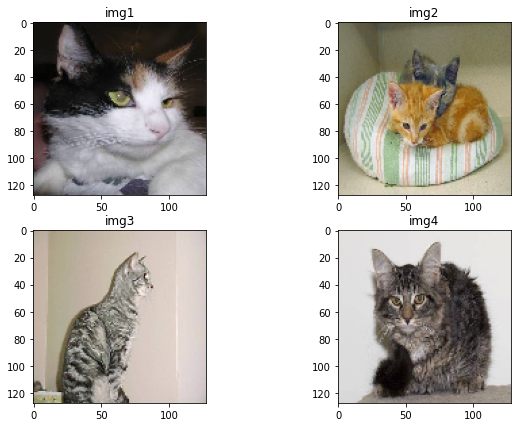

In [ ]:
fig = plt.figure(figsize=(10,7))
rows=2
columns=2

img1 = image.array_to_img(cat_train[0])
img2 = image.array_to_img(cat_train[1])
img3 = image.array_to_img(cat_train[2])
img4 = image.array_to_img(cat_train[3])

fig.add_subplot(rows, columns,1)
plt.imshow(img1)
plt.title("img1")

fig.add_subplot(rows, columns, 2)
plt.imshow(img2)
plt.title("img2")


fig.add_subplot(rows, columns, 3)
plt.imshow(img3)
plt.title("img3")


fig.add_subplot(rows, columns, 4)
plt.imshow(img4)
plt.title("img4")

plt.show()

#plotting the images regenerated by CAE

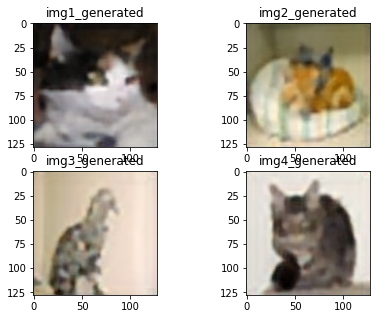

In [ ]:
gen = CAE.predict(cat_train[0:4,:,:,:])
rows=2
columns=2
fig1 = plt.figure(figsize=(7,5))

fig1.add_subplot(rows, columns,1)
plt.imshow(image.array_to_img(gen[0]))
plt.title("img1_generated")

fig1.add_subplot(rows, columns,2)
plt.imshow(image.array_to_img(gen[1]))
plt.title("img2_generated")


fig1.add_subplot(rows, columns,3)
plt.imshow(image.array_to_img(gen[2]))
plt.title("img3_generated")


fig1.add_subplot(rows, columns,4)
plt.imshow(image.array_to_img(gen[3]))
plt.title("img4_generated")
plt.show()